<a href="https://colab.research.google.com/github/codelspak/Struggles/blob/main/WK26_case2_Kaggle_ML_Classification_wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 문제 설명
##### Input Variables
    1. fixed acidity: most acids involved with wine or fixed or nonvolatile
    2. volatile acidity: the amount of acetic acid in wine
    3. citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines
    4. residual sugar: the amount of sugar remaining after fermentation stops
    5. chlorides: the amount of salt in the wine
    6. free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion
    7. total sulfur dioxide: amount of free and bound forms of S02
    8. density: the density of water is close to that of water depending on the percent alcohol and sugar content
    9. pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic)
    10. sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels
    11. alcohol: the percent alcohol content of the wine
Output Variable:

##### output variable (based on sensory data, score between 0 and 10)
    1. quality
print(https://www.kaggle.com/code/tolgahancepel/red-wine-quality-classification-analysis-eda)

# 2. 데이터셋, 라이브러리 불러오기


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from collections import Counter # 
from IPython.core.display import display, HTML # 
sns.set_style('darkgrid')



In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/winequality-red.csv')
df.shape

(1599, 12)

In [3]:
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


# 3. Data Visualization and Preprocessing
print(https://crmrelease.tistory.com/149)

### 3-1. 결측치

In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### 3-2. Numeric_discrete > Categorical feature
    1. quality : 숫자 > good / bad

In [5]:
# labels = ['bad', 'good']
# bins_test = (2, 7, 8)
# df.quality = pd.cut(x = df.quality, bins = bins_test, labels = labels) # right=False로 지정시 우측 범위 미포함
# df.quality.value_counts()

In [6]:
bins = (2, 6.5, 8) # 구간을 고정한다는 전제하에, 리스트보다 속도/메모리가 효율적
labels = ['bad', 'good']
df.quality = pd.cut(x = df.quality, bins = bins, labels = labels) # right=False로 지정시 우측 범위 미포함


In [7]:
df.quality.value_counts()

bad     1382
good     217
Name: quality, dtype: int64

### 3-3. Categorical feature > 코드형 숫자 (Label encoding)
    (ex) 메로나1: 1, 스크류바: 2...)

In [8]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['quality'] = encoder.fit_transform(df['quality']) 
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0


##### label encoding 관련 함수
    1. fit(X, y=None, sample_weight=None)
        - Compute the mean and std to be used for later scaling.
    2. transform(X, copy=None)
        - Perform standardization by centering and scaling
    3. fit_transform(X, y=None, **fit_params)
        - Fit to data, then transform it.
    4. 참고 (https://www.inflearn.com/questions/19038)

### 3-4. 상관관계

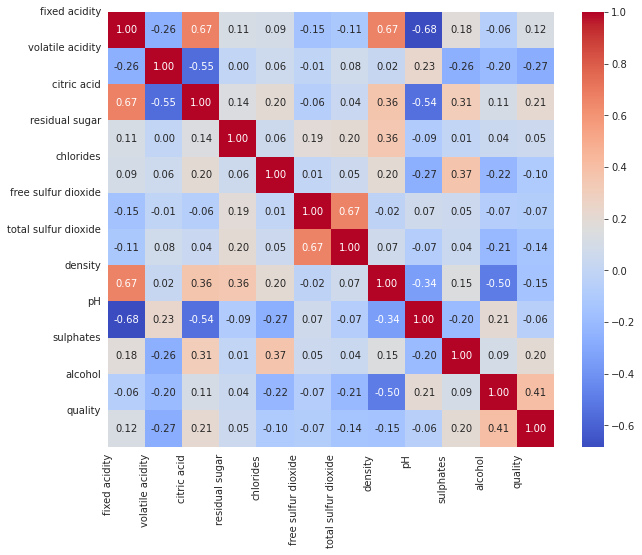

In [9]:
corr = df.corr()

# plot figsize
fig, ax = plt.subplots(figsize = (10,8)) # ax, subplots : stateless, 객체지향적 
sns.heatmap(corr, cmap = 'coolwarm', annot = True, fmt = '.2f')
# 눈금
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns)
plt.show()


##### matplotlib plotting 방식에는 두 가지가 있음
    1. stateless
    2. stateful
(참고. https://hwi-doc.tistory.com/entry/matplotlib-%EC%99%84%EB%B2%BD-%EC%A0%95%EB%A6%AC)

### 3-5. feature 별 데이터 수 및 label data(Quality)와의 관계 분석

In [10]:
df.sample()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1314,7.0,0.36,0.21,2.4,0.086,24.0,69.0,0.99556,3.4,0.53,10.1,0


#### feature 별 count - histogram

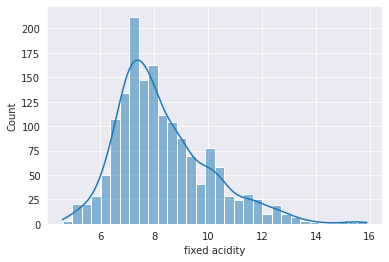

In [11]:
_ = sns.histplot(data = df, x = 'fixed acidity', kde = True)

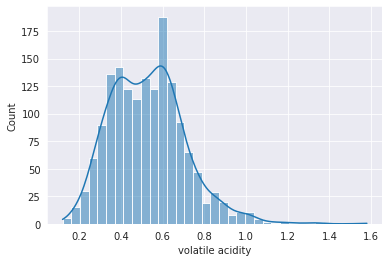

In [12]:
_ = sns.histplot(data = df, x = 'volatile acidity', kde = True)

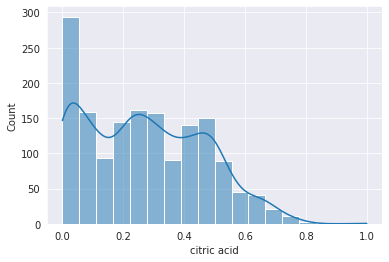

In [13]:
_ = sns.histplot(data = df, x = 'citric acid', kde = True)

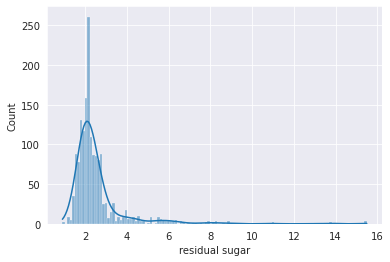

In [14]:
_ = sns.histplot(data = df, x = 'residual sugar', kde = True)

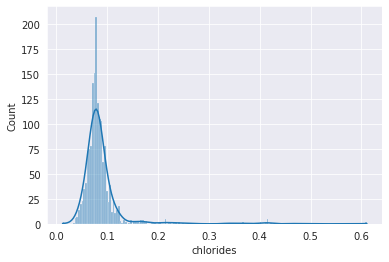

In [15]:
_ = sns.histplot(data = df, x = 'chlorides', kde = True)

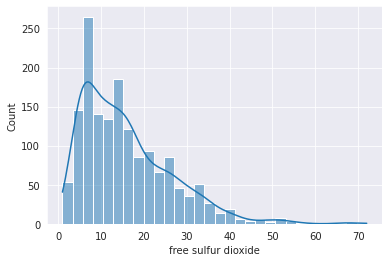

In [16]:
_ = sns.histplot(data = df, x = 'free sulfur dioxide', kde = True)

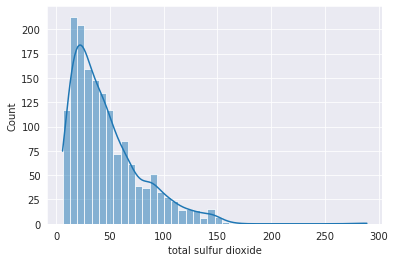

In [17]:
_ = sns.histplot(data = df, x = 'total sulfur dioxide', kde = True)

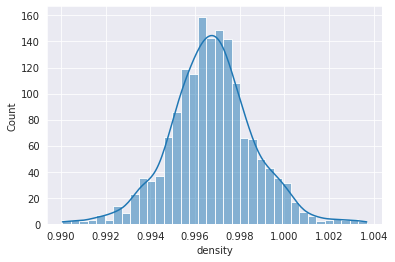

In [18]:
_ = sns.histplot(data = df, x = 'density', kde = True)

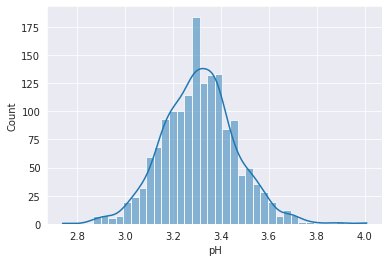

In [19]:
_ = sns.histplot(data = df, x = 'pH', kde = True)

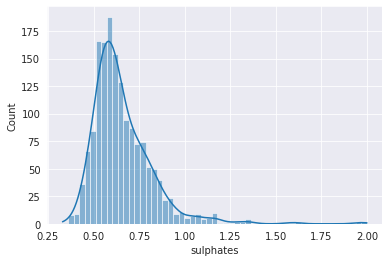

In [20]:
_ = sns.histplot(data = df, x = 'sulphates', kde = True)

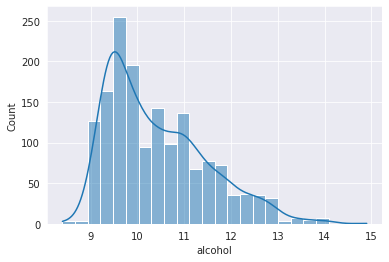

In [21]:
_ = sns.histplot(data = df, x = 'alcohol', kde = True)

##### 분포가 치우쳐 보이는 애들, 로그1p 취해줘 봄!


In [22]:
temp = df.copy()
temp['fsd_log1p'] = np.log1p(temp['free sulfur dioxide'])
temp['sulphates_log1p'] = np.log1p(temp['sulphates'])
temp['ca_log1p'] = np.log1p(temp['citric acid'])
temp['rs_log1p'] = np.log1p(temp['residual sugar'])
temp['chlorides_log1p'] = np.log1p(temp['chlorides'])
temp['alcohol_log1p'] = np.log1p(temp['alcohol'])
temp.sample()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,fsd_log1p,sulphates_log1p,ca_log1p,rs_log1p,chlorides_log1p,alcohol_log1p
1061,9.1,0.4,0.5,1.8,0.071,7.0,16.0,0.99462,3.21,0.69,12.5,1,2.079442,0.524729,0.405465,1.029619,0.068593,2.60269


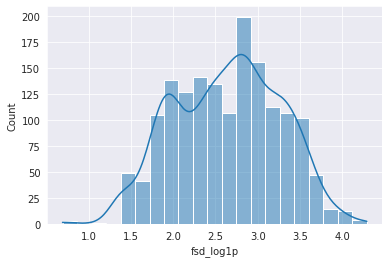

In [23]:
sns.histplot(data = temp, x = 'fsd_log1p', kde = True)

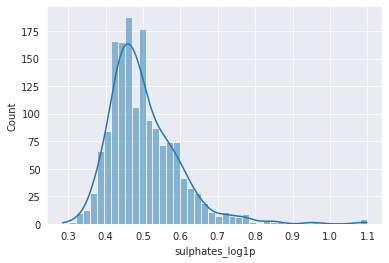

In [24]:
sns.histplot(data = temp, x = 'sulphates_log1p', kde = True)

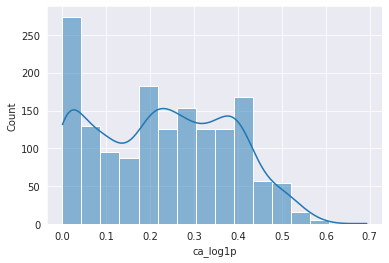

In [25]:
sns.histplot(data = temp, x = 'ca_log1p', kde = True)

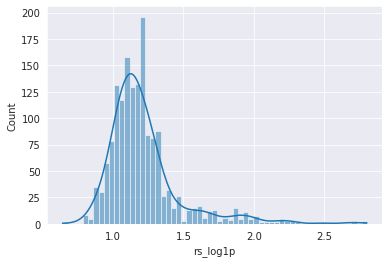

In [26]:
sns.histplot(data = temp, x = 'rs_log1p', kde = True)

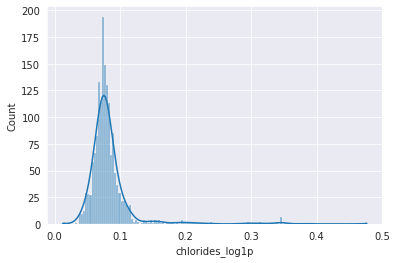

In [27]:
sns.histplot(data = temp, x = 'chlorides_log1p', kde = True)

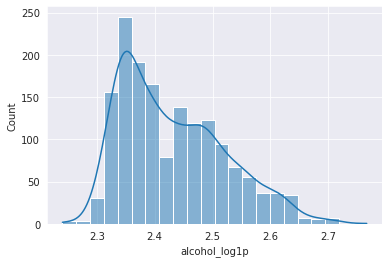

In [28]:
sns.histplot(data = temp, x = 'alcohol_log1p', kde = True)

#### violinplot - feature / Quality

In [29]:
df.sample()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1552,6.3,0.68,0.01,3.7,0.103,32.0,54.0,0.99586,3.51,0.66,11.3,0


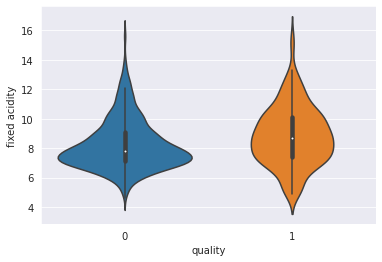

In [30]:
_ = sns.violinplot(data = df, y = 'fixed acidity', x = 'quality')

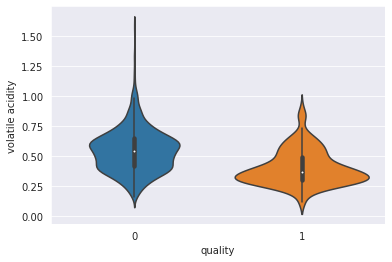

In [31]:
_ = sns.violinplot(data = df, y = 'volatile acidity', x = 'quality')

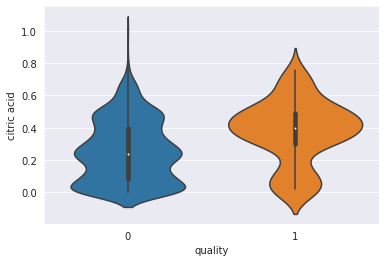

In [32]:
_ = sns.violinplot(data = df, y = 'citric acid', x = 'quality',  )

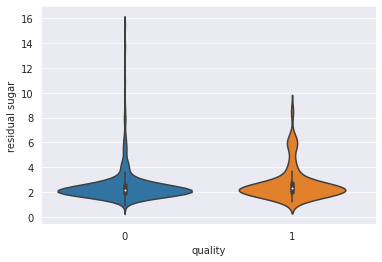

In [33]:
_ = sns.violinplot(data = df, y = 'residual sugar', x = 'quality')

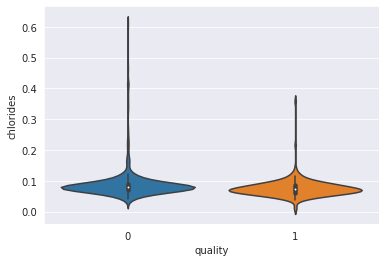

In [34]:
_ = sns.violinplot(data = df, y = 'chlorides', x = 'quality')

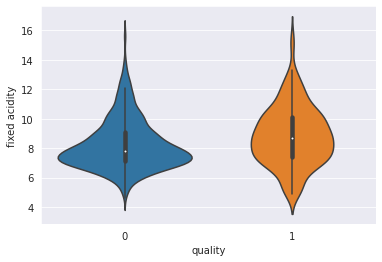

In [35]:
_ = sns.violinplot(data = df, y = 'fixed acidity', x = 'quality')

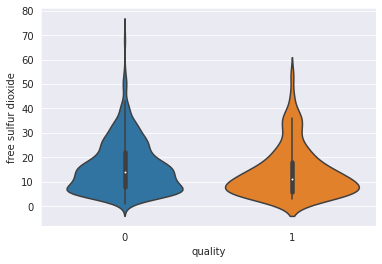

In [36]:
_ = sns.violinplot(data = df, y = 'free sulfur dioxide', x = 'quality')

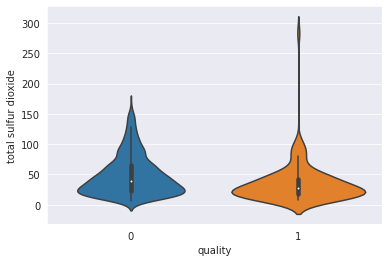

In [37]:
_ = sns.violinplot(data = df, y = 'total sulfur dioxide', x = 'quality')

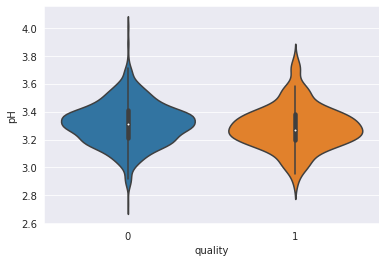

In [38]:
_ = sns.violinplot(data = df, y = 'pH', x = 'quality')

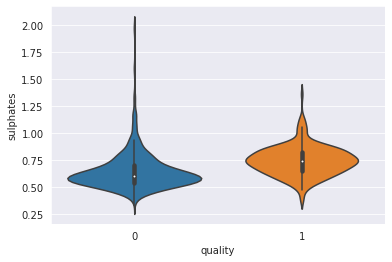

In [39]:
_ = sns.violinplot(data = df, y = 'sulphates', x = 'quality')

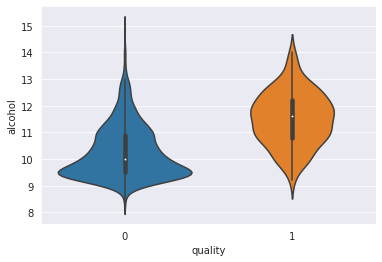

In [40]:
_ = sns.violinplot(data = df, y = 'alcohol', x = 'quality')

# 4. Classification Models

### 4-1. label data 분석

In [41]:
df.quality.value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [42]:
df.quality.value_counts(normalize = True) * 100

0    86.429018
1    13.570982
Name: quality, dtype: float64

In [43]:
print(df.shape)
display(df.sample(3))

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
250,10.8,0.320,0.44,1.6,0.063,16.0,37.0,0.99850,3.22,0.78,10.0,0
1093,9.2,0.310,0.36,2.2,0.079,11.0,31.0,0.99615,3.33,0.86,12.0,1
270,7.9,0.545,0.06,4.0,0.087,27.0,61.0,0.99650,3.36,0.67,10.7,0


### 4-2. Training / Testing data 생성

In [44]:
X = df.copy().drop('quality', axis = 1)

In [50]:
y = df['quality'].values.reshape(-1,1)
# .values.shape : (1599,) > .values.reshape(-1,1) : (1599,1)

근데 얘, 그냥 y = df[['quality']].copy() 해주면 안 되는 거임? 왜 굳이 array를 선언해서 reshape을 해주지? 메모리가 더 좋은가? 

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 17)

In [54]:
print(f"Shape \nX_train: \t\t{X_train.shape}\ny_train: \t\t{y_train.shape}\nX_test: \t\t{X_test.shape}\ny_test: \t\t{y_test.shape}\n")

Shape 
X_train: 		(1279, 11)
y_train: 		(1279, 1)
X_test: 		(320, 11)
y_test: 		(320, 1)



### 4-3. Feature Scaling (3-5 참고)

In [59]:
from sklearn.preprocessing import StandardScaler

stdscaler = StandardScaler() # 평균 0 , 분산 1로 조정
X_train_scaled = stdscaler.fit_transform(X_train)
X_test_scaled = stdscaler.fit_transform(X_test)

### 4-4. Decision Tree Classification

#### fitting classifier to the training dataset

In [63]:
from sklearn.tree import DecisionTreeClassifier

treeclf = DecisionTreeClassifier(criterion = 'entropy',
                                 max_depth = 10, max_features = 0.8,
                                 random_state = 17)
treeclf.fit(X_train_scaled, y_train.ravel())
# y_train.shape, y_train.ravel().shape = ((1279, 1), (1279,))
# 둘 다 튜플인데, 뭔 차이가 있는거임? 단순히 차원의 문제인가?

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features=0.8,
                       random_state=17)

#### Predict Cross Validation Score
     - Evaluate a score by cross-validation.
     - estimator : estimator object implementing 'fit'
     - verbose : int, default=0. The verbosity level.

In [66]:
# from sklearn.model_selection import cross_val_score

tree_cv = cross_val_score(estimator = treeclf,
                          X = X_train_scaled, y = y_train.ravel(), cv = 8, n_jobs = -1)
print("CV: ", tree_cv.mean())

tree_y_pred_train = treeclf.predict(X_train_scaled)
tree_accuracy_train = accuracy_score(y_train, tree_y_pred_train)
print("Training set: ", tree_accuracy_train)

tree_y_pred_test = treeclf.predict(X_test_scaled)
tree_accuracy_test = accuracy_score(y_test, tree_y_pred_test)
print("Testing set: ", tree_accuracy_test)


CV:  0.868656643081761
Training set:  0.980453479280688
Testing set:  0.896875


In [69]:
# from sklearn.model_selection import confusion_matrix
array_cm = confusion_matrix(y_test, tree_y_pred_test)
array_cm

array([[266,  17],
       [ 16,  21]])

In [70]:
tree_tp = array_cm[0,0]
tree_tn = array_cm[1,1]
tree_fp = array_cm[0,1]
tree_fn = array_cm[1,0]
tree_total = tree_tp + tree_tn + tree_fp + tree_fn
print(f"Accuracy: \t\t{(tree_tp+tree_tn)/(tree_total)}\nPrecision: \t\t{tree_tp/(tree_tp + tree_fp)}\nRecall: \t\t{tree_tp/(tree_tp+tree_fn)}\n")

Accuracy: 		0.896875
Precision: 		0.9399293286219081
Recall: 		0.9432624113475178



## 4-2. Random Forest Classification

#### fitting classifier to the training dataset

In [75]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier

rfclf = RandomForestClassifier(criterion = 'entropy', 
                               n_estimators = 500, max_depth = 10, max_features = 10, 
                               random_state = 17)
rfclf.fit(X_train_scaled, y_train.ravel())

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=10,
                       n_estimators=500, random_state=17)

#### predicting Cross Validation Score

In [79]:
rf_cf = cross_val_score(estimator = rfclf, 
                        X = X_train_scaled, y = y_train.ravel(), 
                        cv = 10)
print("CV: ", rf_cf.mean())

rf_y_pred_train = rfclf.predict(X_train_scaled)
rf_accuracy_train = accuracy_score(y_train, rf_y_pred_train)
print("Training set: ", rf_accuracy_train)

rf_y_pred_test = rfclf.predict(X_test_scaled)
rf_accuracy_test = accuracy_score(y_test, rf_y_pred_test)
print("Test set: ", rf_accuracy_test)

# 얘는 여러 번 돌려도 결과가 똑같네. classifier (rfclf)을 앞에서 fit해주고, 이번 셀에서는 그냥 그걸로 CV만 돌려서 그런가? 

CV:  0.9007258858267717
Training set:  0.99687255668491
Test set:  0.915625


In [82]:
rf_array_cm = confusion_matrix(y_test, rf_y_pred_test)
rf_array_cm

array([[273,  10],
       [ 17,  20]])

In [83]:
rf_tp = rf_array_cm[0,0]
rf_tn = rf_array_cm[1,1]
rf_fp = rf_array_cm[0,1]
rf_fn = rf_array_cm[1,0]
rf_total = rf_tp + rf_tn + rf_fp + rf_fn
print(f"Accuracy: \t\t{(rf_tp+rf_tn)/(rf_total)}\nPrecision: \t\t{rf_tp/(rf_tp + rf_fp)}\nRecall: \t\t{rf_tp/(rf_tp+rf_fn)}\n")

Accuracy: 		0.915625
Precision: 		0.9646643109540636
Recall: 		0.9413793103448276



## 4-3. K-Nearest Neighbors(K-NN)

#### fitting classifier to the Training set

In [84]:
from sklearn.neighbors import KNeighborsClassifier

knnclf = KNeighborsClassifier(n_neighbors = 40,
                              weights = 'distance', metric = 'minkowski')
knnclf.fit(X_train_scaled, y_train.ravel())

KNeighborsClassifier(n_neighbors=40, weights='distance')

#### predicting Cross Validation Score

In [85]:
knn_cv = cross_val_score(estimator = knnclf, 
                         X = X_train_scaled, y = y_train.ravel(), 
                         cv = 10)
print("CV: ", knn_cv.mean())

knn_y_pred_train = knnclf.predict(X_train_scaled)
knn_accuracy_train = accuracy_score(y_train, knn_y_pred_train)
print("Training set: ", knn_accuracy_train)

knn_y_pred_test = knnclf.predict(X_test_scaled)
knn_accuracy_test = accuracy_score(y_test, knn_y_pred_test)
print("Test set: ", knn_accuracy_test)

CV:  0.8968073326771654
Training set:  1.0
Test set:  0.9


In [86]:
knn_array_cm = confusion_matrix(y_test, knn_y_pred_test)
knn_array_cm

array([[275,   8],
       [ 24,  13]])

In [87]:
knn_tp = knn_array_cm[0,0]
knn_tn = knn_array_cm[1,1]
knn_fp = knn_array_cm[0,1]
knn_fn = knn_array_cm[1,0]
knn_total = knn_tp + knn_tn + knn_fp + knn_fn
print(f"Accuracy: \t\t{(knn_tp+knn_tn)/(knn_total)}\nPrecision: \t\t{knn_tp/(knn_tp + knn_fp)}\nRecall: \t\t{knn_tp/(knn_tp+knn_fn)}\n")

Accuracy: 		0.9
Precision: 		0.9717314487632509
Recall: 		0.919732441471572



# 5. Measuring the Error / Visualization

In [96]:
models = [('Decision Tree', tree_tp, tree_fp, tree_tn, tree_fn, round(tree_accuracy_train,2), round(tree_accuracy_test,2), round(tree_cv.mean(),2)),
          ('Random Forest', rf_tp, rf_fp, rf_tn, rf_fn, round(rf_accuracy_train,2), round(rf_accuracy_test,2), round(rf_cf.mean(),2)),
          ('K-Nearest Neighbors (KNN)', knn_tp, knn_fp, knn_tn, knn_fn, round(knn_accuracy_train,2), round(knn_accuracy_test,2), round(knn_cv.mean(),2))    
         ]

In [97]:
predict_results = pd.DataFrame(data = models, 
                               columns=['Model(Classification)', 'True Positive', 'False Positive', 'True Negative','False Negative', 
                                        'Accuracy(training)', 'Accuracy(test)','Cross-Validation'])
predict_results

,Model(Classification),True Positive,False Positive,True Negative,False Negative,Accuracy(training),Accuracy(test),Cross-Validation
0,Decision Tree,266,17,21,16,0.98,0.90,0.87
1,Random Forest,273,10,20,17,1.00,0.92,0.90
2,K-Nearest Neighbors (KNN),275,8,13,24,1.00,0.90,0.90


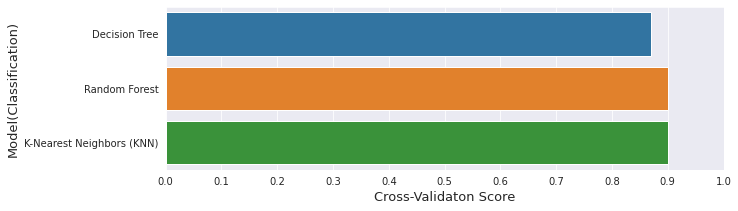

In [122]:
f, axe = plt.subplots(1,1, figsize=(10,3))
predict_results.sort_values(by=['Cross-Validation', 'Accuracy(test)'], ascending=False, inplace=False)

sns.barplot(x='Cross-Validation', y='Model(Classification)', data = predict_results, ax = axe)
axe.set_xlabel('Cross-Validaton Score', size=13)
axe.set_ylabel('Model(Classification)', size=13)
axe.set_xlim(0,1.0)
axe.set_xticks(np.arange(0, 1.1, 0.1))
plt.show()

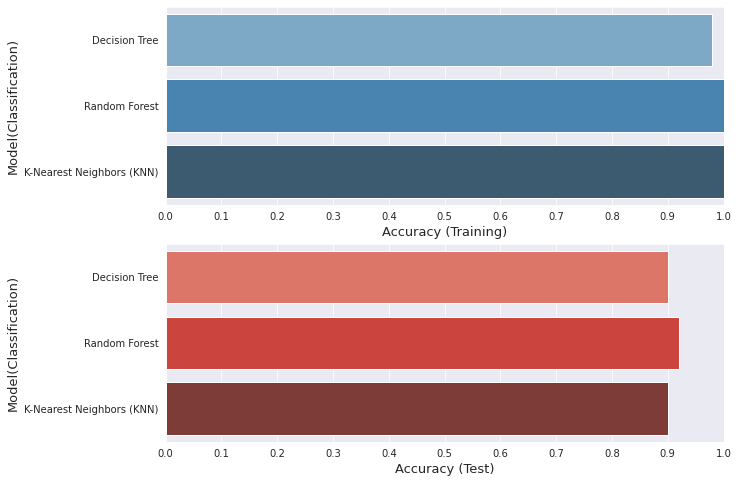

In [118]:
f, axes = plt.subplots(2,1, figsize=(10,8))
predict_results.sort_values(by=['Cross-Validation', 'Accuracy(test)'], ascending=False, inplace=False)

sns.barplot(x='Accuracy(training)', y='Model(Classification)', data = predict_results, palette='Blues_d', ax = axes[0])
axes[0].set_xlabel('Accuracy (Training)', size=13)
axes[0].set_ylabel('Model(Classification)', size=13)
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

sns.barplot(x='Accuracy(test)', y='Model(Classification)', data = predict_results, palette='Reds_d', ax = axes[1])
axes[1].set_xlabel('Accuracy (Test)', size=13)
axes[1].set_ylabel('Model(Classification)', size=13)
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

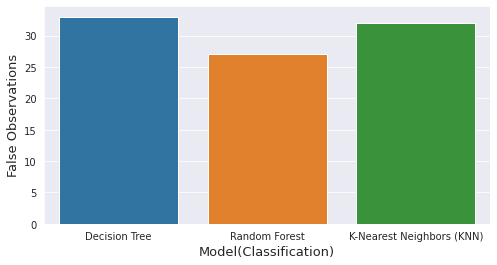

In [116]:
predict_results.sort_values(by=['Cross-Validation', 'Accuracy(test)'], ascending=False, inplace=False)

f, axe = plt.subplots(1,1, figsize=(8,4))
sns.barplot(x = predict_results['Model(Classification)'], y=predict_results['False Positive'] + predict_results['False Negative'], ax = axe)
axe.set_xlabel('Model(Classification)', size=13)
axe.set_ylabel('False Observations', size=13)

plt.show()

# 6. Conclusion